In [70]:
# EDA enligt https://www.kaggle.com/code/ayushikaushik/eda-regression-analysis#Preprocessing-the-data

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv('data/stores_train.csv')

print(f"Shape of training data: {train_data.shape}\nFeatures available: {train_data.columns}")

Shape of training data: (12859, 12)
Features available: Index(['store_id', 'year', 'store_name', 'plaace_hierarchy_id',
       'sales_channel_name', 'grunnkrets_id', 'address', 'lat', 'lon',
       'chain_name', 'mall_name', 'revenue'],
      dtype='object')


In [72]:
# To see all the columns in output this can be done.
pd.options.display.max_columns=None
# To see all rows change max_columns with max_rows

train_data.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,59.913759,10.734031,MCDONALDS,NaN,23.828
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [73]:
# Check if there are missing values => true, so there are
train_data.isnull().sum().any()

True

In [74]:
# Replace NaN in mall_name column with 'No mall'
train_data.mall_name = train_data.mall_name.fillna('No mall')
train_data.address = train_data.address.fillna('No address')
train_data.chain_name = train_data.chain_name.fillna('No chain')

In [75]:
train_data.head()

,store_id,year,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,2016,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,2016,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,No address,59.913759,10.734031,MCDONALDS,No mall,23.828
2,984890265-981157303-64491,2016,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,2016,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,2016,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,No address,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [84]:
# Check if there are missing values => false, so there aren't anymore :)
train_data.isnull().sum().any()

False

In [77]:
# 'year' column is redundant, remove it
train_data = train_data.drop('year',axis=1)

In [78]:
train_data.head()

,store_id,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,lat,lon,chain_name,mall_name,revenue
0,983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,59.743104,10.204928,MCDONALDS,Magasinet Drammen,17.998
1,987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,No address,59.913759,10.734031,MCDONALDS,No mall,23.828
2,984890265-981157303-64491,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,60.164751,10.254656,BURGER KING,Kuben Hønefoss,16.099
3,914057442-992924179-126912,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,67.283669,14.379796,BURGER KING,Glasshuspassasjen,9.296
4,913018583-913063538-668469,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,No address,63.358068,10.374832,BURGER KING,Tillertorget,4.528


In [79]:
#train_data['store_name'] = pd.factorize(train_data['store_name'])[0]

In [80]:
#train_data.head()

/var/folders/v4/l760qmd51vl3yg0k0ly6n5fw0000gn/T/ipykernel_24626/1393849137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['revenue'],hist=False)


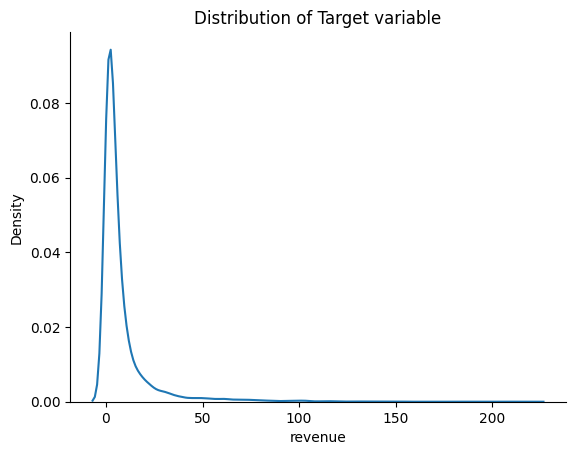

In [81]:
sns.distplot(train_data['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine() # removes top and right border from the figure

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/v4/l760qmd51vl3yg0k0ly6n5fw0000gn/T/ipykernel_24626/3849053235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_data['revenue']),hist=False)


Text(0.5, 1.0, 'Distribution of Target variable')

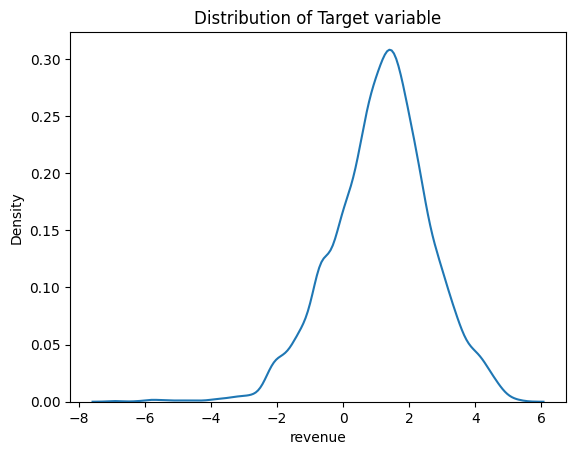

In [82]:
sns.distplot(np.log(train_data['revenue']),hist=False)
plt.title('Distribution of Target variable')

In [83]:
# The data is ≈ normally distributed when plotted in log